# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
import tensorflow.keras.datasets.mnist as input_data
(x_train, _), (x_test, y_test) = input_data.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

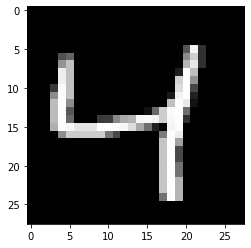

In [3]:
img = x_train[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. We also need to normalize the images in the dataset such that the values are between 0 and 1.


In [4]:
#Flattening the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

#Normalize the images
x_train = x_train/255.
x_test = x_test/255.

Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. For instance, you would use [`model.add(Dense(units, input_shape, activation="relu"))`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) to create a fully connected layer with a ReLU activation. 

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

# Size of the input and output Layer
input_size = 784

# create sequential model
model = Sequential()

# create hidden Layer
model.add(Dense(encoding_dim, input_shape=(input_size,), activation="relu"))

# create output layer 
model.add(Dense(input_size, activation="sigmoid"))

## Training
Before we can start the training we need to compile our model. We will use the `adam` optimizer and `binary_crossentropy` as the loss function.
> **Exercise:** Compile the model

In [6]:
from tensorflow.keras.optimizers import Adam

# compile the model
model.compile(optimizer="adam", loss='binary_crossentropy')

Now we are ready for the training. Because we are not too interested in validation here, we will just monitor the training loss.

Calling `model.fit()` will start the process. Instead of using the mnist labels we will pass the input images as labels. This needs to be done because the autoencoder compares its predictions with the original image to calculate its loss. 

In [7]:
epochs = 20
batch_size = 200

model.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2604
Epoch 2/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1617
Epoch 3/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1347
Epoch 4/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1200
Epoch 5/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1108
Epoch 6/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1046
Epoch 7/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1004
Epoch 8/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0976
Epoch 9/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0960
Epoch 10/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0951
Epoch 11/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0945
Epoch 1

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

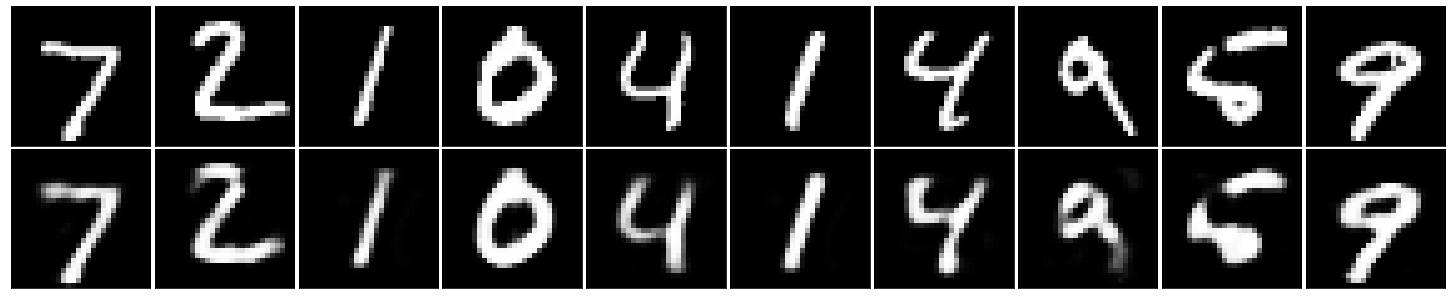

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = x_test[:10]
in_imgs = in_imgs.reshape((len(in_imgs), np.prod(in_imgs.shape[1:])))
#reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})
reconstructed = model.predict(in_imgs)
for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.